<a href="https://colab.research.google.com/github/YooSeungWan12/ex02/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%98_%EB%AA%A8%EB%93%A0%EA%B2%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')  #구글드라이브 연동

Mounted at /content/drive


실습준비!

KFold

가장 보편적으로 사용되는 교차 검증 기법

먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습고 검증 평가를 1반복적으로 수행하는 방법

학습 데이터 세트와 검증 데이터 세트를 점진적으로 변경하면서 마지막 5번째(K번째)까지 학습과 검증을 수행하는 것이 바로 K 폴드 교차 검증



StratifiedKFold : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식입니다.

특정 레이블 값이 특이하게 많거나, 매우 적어서 값의 분포가 한쪽으로 치우치는 경우


https://velog.io/@ohxhxs/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D-KFold-StratifiedKFold-crossvalscoreGridSearchCV

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
os.getcwd()

'/content'

In [6]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data-master/pima-indians-diabetes3.csv')
#피마 인디언 당뇨병 데이터셋 불러오기

In [8]:
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
# X= df.iloc[:,0:8]
# y= df.iloc[:,8]

X=df.drop('diabetes',axis=1)
y=df['diabetes']#당뇨병 유무

In [15]:
X

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [17]:
ss = StandardScaler() # 표준화모델생성  
 #모든 애들을 평균이 0이고 분산이 1인 정규 분포로 만드는 것 
 #(Xi - (X의 평균)) / (X의 표준편차)로 바꿈..
 #ss.fit_transform(X)

In [19]:
scaled_x = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
#표준화시킨x 데이터프레임 생성, 데이터는 표준화시킨것, 컬럼명은 X의 컬럼명을 그대로 사용

밀도 그래프

관찰값을 사용해서 추정되는 연속된 확률 분포를 그린다.

일반적인 과정은 kernel 메서드를 잘 섞어 이 분포를 근사하는 방법이나 이보다 단순한 정규분포이다.

그래서 밀도 그래프는 KDE(Kernel Density Estimate : 커넬 밀도 추정)그래프라고도 알려져 있다.

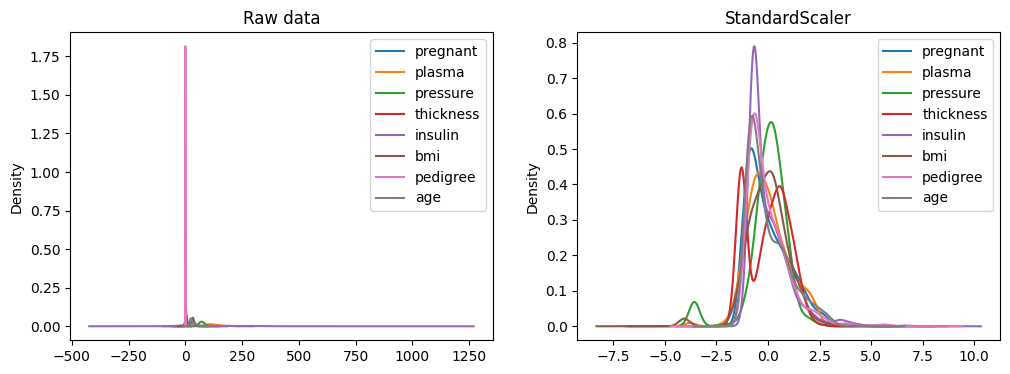

In [23]:
# 여러개의 ax를 가지는 하나의 figure 생성 
#1행 2열짜리  ax를 가진 하나의 figure생성..
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
X.plot(kind='kde',title='Raw data',ax=ax[0]) # 첫번째 칸엔 표준화안한 데이터로 밀도데이터 생성
scaled_x.plot(kind='kde',title='StandardScaler',ax=ax[1]) #두번째칸은 표준화한 데이터로 밀도데이터 생성..
plt.show()
#즉 표준화의 필요성을 보여주는..? 느낌


In [24]:
#학습과 테스트셋 나누기  25퍼로
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

사이킷런 기본순서

1. 라이브러리에서 알고리즘 불러오기
2.fit로 학습
3.predict로 예측

1. 결정트리(DecisionTree)

결정트리는 예/아니요라는 답이 나오는 질문을 계속 물으며 학습하는 방법

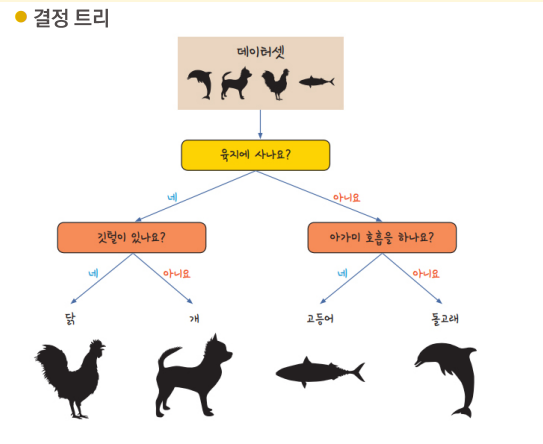

In [25]:
from sklearn.tree import DecisionTreeClassifier #알고리즘 가져오기

In [26]:
#학습환경 설정(모델학습)
classifier = DecisionTreeClassifier() #학습모델생성
classifier.fit(X_train,y_train) #트레이닝 데이터들로 학습하기

DecisionTreeClassifier()

In [28]:
#테스트셋에 적용하기
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: diabetes, Length: 192, dtype: int64

In [30]:
#계층별 교차검증 환경 설정

skf = StratifiedKFold(n_splits=10,shuffle=True)  #10개로 나눈다.
#shuffle 매개변수를 기본 값 FALSE 대신 TRUE  지정하면 폴드 나누기 전 무작위로 섞임 


In [33]:
#교차 검증을 통해 정확도를 계산한다
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
accuracies

# esmitator :  사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미
# X : 피처 데이터 세트
# y : 레이블 데이터 세트
# scoring : 예측 성능 평가 지표를 기술
# cv : 교차 검증 폴드 수


# cross_val_score( ) 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환한다.
# cross_val_score( )는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 
#학습/테스트 세트를 분할한다.
 #(회귀인 경우에는 Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할한다).
 

array([0.68965517, 0.70689655, 0.70689655, 0.65517241, 0.67241379,
       0.68965517, 0.64912281, 0.70175439, 0.75438596, 0.61403509])

사이킷런은 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API를 제공한다. 대표적인 것이 cross_val_score( )이다.

 

KFold로 데이터를 학습하고 예측하는 코드를 보면 먼저 ① 폴드 세트를 설정하고 ② for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 ③ 반복적으로 학습과 예측을 수행하고 예측 성능을 반환하였다.

 

cross_val_score( )는 이런 일련의 과정을 한꺼번에 수행해주는 API 이다.

https://blog.eunsour.dev/46

In [35]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
#정확도

Accuracy : 68.40 %


In [34]:
accuracies.mean()

0.6839987900786448

In [36]:
accuracies.std()

0.036686027084305566

In [38]:
#표준편차     
print("Stanard Deviation : {:.2f} %".format(accuracies.std()*100))

Stanard Deviation : 3.67 %


2. 랜덤 포레스트(random forest)

랜덤포레스트는 결정트리를 여러개 묶은것,

하나의 결정트리가 아닌 많은 결정트리를 실행해 나온 분류 결과를 취합하여 예측하는 알고리즘

과적합에 빠지기쉬운 결정트리의 단점 보완

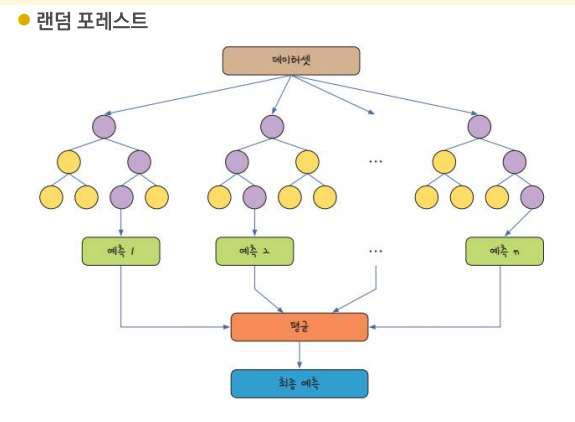

In [40]:
#랜덤 포레스트 분류기

from sklearn.ensemble import RandomForestClassifier

n_estimators : 랜덤 포레스트를 구성하는 결정 트리의 개수입니다. 기본값은 100으로 설정되어 있습니다. 너무 많거나 적은 수를 입력하면 성능이 떨어지므로 적정 수준의 값을 찾아서 넣어야 합니다.

• max_depth : 결정 트리와 동일하게, 각 트리의 최대 깊이를 제한합니다. 숫자가 낮을수록 오버피팅을 피할 수 있으며, 또한 언더피팅의 위험도 올라갑니다.

• min_samples_split : 해당 노드를 나눌 것인지 말 것인지를 노드 데이터 수를 기준으로 판단합니다. 
이 매개변수에 지정된 숫자보다 적은 수의 데이터가 노드에 있으면 더는 분류하지 않습니다. 숫자가 높을수록 분리되는 노드가 적어질 것이므로, 오버피팅을 피하는 방법이자 언더피팅의 위험도 있습니다. 기본값은 2입니다.

• min_samples_leaf : 분리된 노드의 데이터에 최소 몇 개의 데이터가 있어야 할지를 결정하는 매개
변수입니다. 여기에 지정된 숫자보다 적은 수의 데이터가 분류된다면, 해당 분리는 이루어지지 않습니다. 마찬가지로 숫자가 클수록 오버피팅을 피할 수 있고, 언더피팅의 위험도는 높아집니다. 기
본값은 1입니다.

• n_jobs : 병렬 처리에 사용되는 CPU 코어 수입니다. 많은 코어를 사용할수록 속도가 빨라지며, -1을 입력하면 지원하는 모든 코어를 사용합니다. 기본값은 None으로, 실제는 1개 코어를 사용합니다. 
랜덤 포레스트의 속도가 다소 느린만큼 충분한 코어를 사용하는 게 좋습니다.

In [41]:
#학습환경 설정
classifier = RandomForestClassifier(n_estimators=50)
#n_estimators의 수가  몇개의 결정트리를 사용할지 정한다.  50개 사용

classifier.fit(X_train,y_train) #학습

RandomForestClassifier(n_estimators=50)

In [42]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [43]:
#계층별 교차검증 환경설정

skf = StratifiedKFold(n_splits=10,shuffle=True)  #10개로 나눈다.
#shuffle 매개변수를 기본 값 FALSE 대신 TRUE  지정하면 폴드 나누기 전 무작위로 섞임 

In [45]:
#교차 검증을 통해 정확도계산

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

In [46]:
#정확도
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))

#표준편차     
print("Stanard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.31 %
Stanard Deviation : 6.30 %


3. 가우시안 나이브 베이즈

속성이 연속형 변수일때, 베이즈정리를 기반으로 각 범주에 속할 확률을 계산하는방법


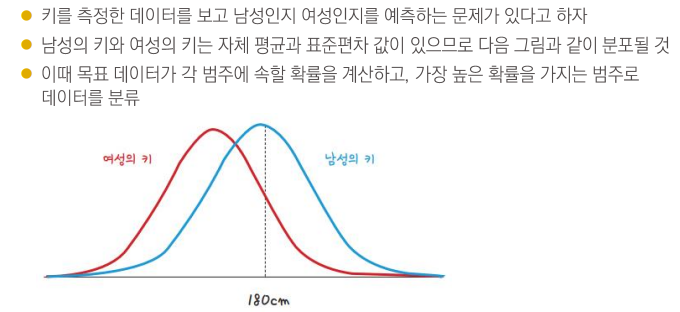

In [47]:
#나이브 베이즈 분류기 불러오기
from sklearn.naive_bayes import GaussianNB

In [48]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [49]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
#계층별 교차검증 환경설정

skf = StratifiedKFold(n_splits=10,shuffle=True)  #10개로 나눈다.
#shuffle 매개변수를 기본 값 FALSE 대신 TRUE  지정하면 폴드 나누기 전 무작위로 섞임 

#교차 검증을 통해 정확도계산

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

#정확도
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))

#표준편차     
print("Stanard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 75.52 %
Stanard Deviation : 4.07 %


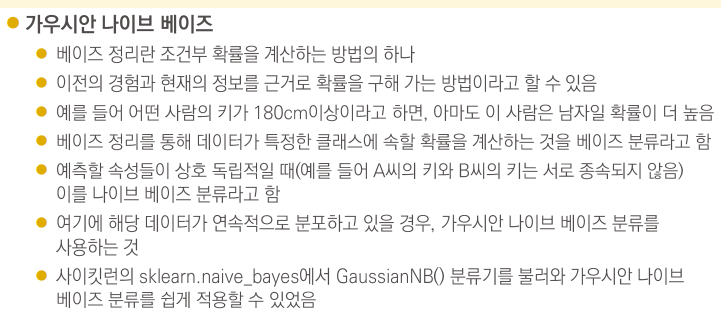


4.k-최근접 이웃(K-Nearest Neighbor)  KNN

새로운 데이터가 입력되면 가장 가까이있는 값을 중심으로 새로운 데이터의 종류를 정해주는것

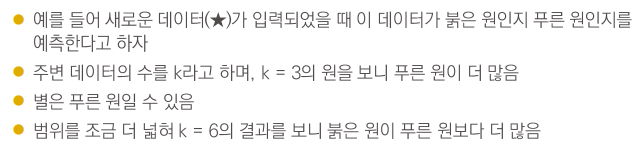

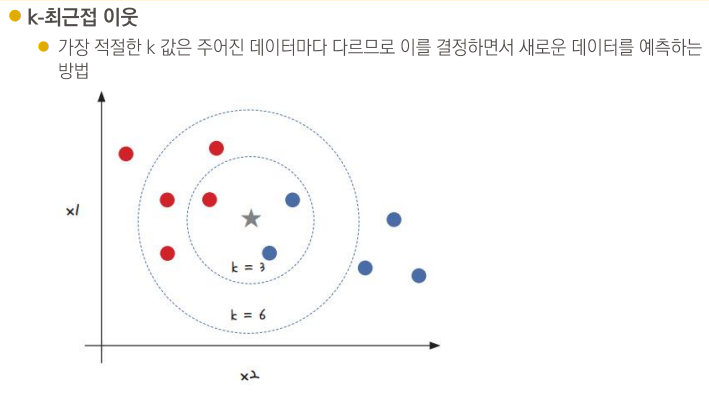



In [51]:
#KNN 분류기 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [52]:
classifier = KNeighborsClassifier() #하이퍼 파라미터 튜닝하려면 (n_neighbors=몇개의 이웃을 참조할지)
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [53]:
#계층별 교차검증 환경설정

skf = StratifiedKFold(n_splits=10,shuffle=True)  #10개로 나눈다.
#shuffle 매개변수를 기본 값 FALSE 대신 TRUE  지정하면 폴드 나누기 전 무작위로 섞임 

#교차 검증을 통해 정확도계산

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

#정확도
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))

#표준편차     
print("Stanard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 69.98 %
Stanard Deviation : 2.33 %


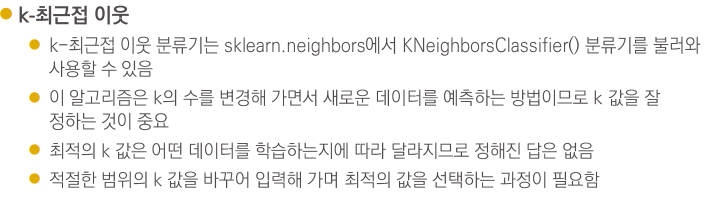

5. 에이다 부스트(ada boost)

여러번의 분류를 통해 정답예측하는 알고리즘

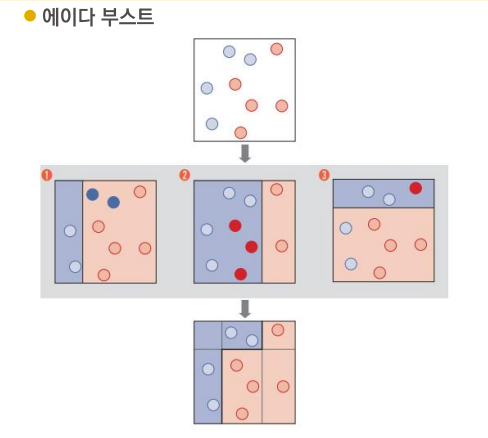
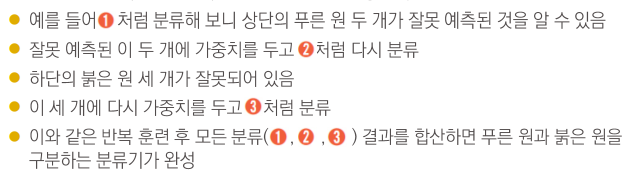

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
classifier = AdaBoostClassifier() 
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [57]:
#계층별 교차검증 환경설정

skf = StratifiedKFold(n_splits=10,shuffle=True)  #10개로 나눈다.
#shuffle 매개변수를 기본 값 FALSE 대신 TRUE  지정하면 폴드 나누기 전 무작위로 섞임 

#교차 검증을 통해 정확도계산

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

#정확도
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))

#표준편차     
print("Stanard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 71.71 %
Stanard Deviation : 4.94 %


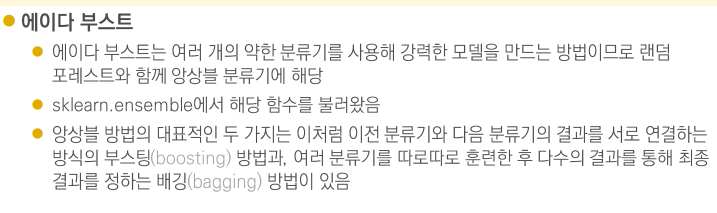

6. 이차판별분석(QuadraticDiscriminantAnalysis)

각 클래스간 경계를 결정해 분류하는방법

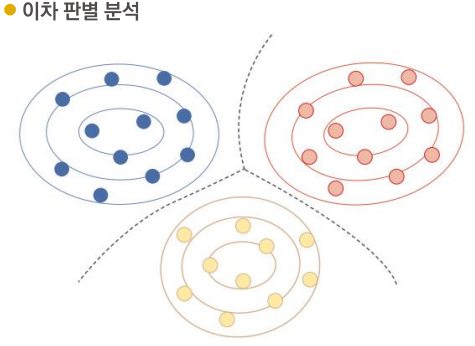

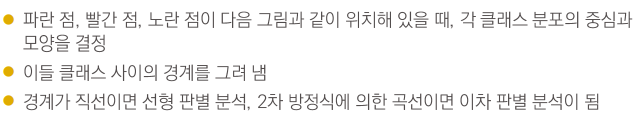

In [59]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [60]:
classifier = QuadraticDiscriminantAnalysis() 
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [61]:
#계층별 교차검증 환경설정

skf = StratifiedKFold(n_splits=10,shuffle=True)  #10개로 나눈다.
#shuffle 매개변수를 기본 값 FALSE 대신 TRUE  지정하면 폴드 나누기 전 무작위로 섞임 

#교차 검증을 통해 정확도계산

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

#정확도
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))

#표준편차     
print("Stanard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 73.09 %
Stanard Deviation : 4.93 %


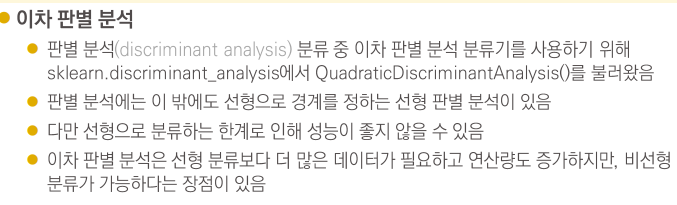

보팅  

보팅은 여러가지 다른 유형의 알고리즘을 같은 데이터셋에 적용해 학습하는방법

학습한 결과를 모아 다수의 분류기가 결정한 결과를 선택하거나 평균을 종합해 예측한다.

다양한 알고리즘을 사용함으로 단일 알고리즘의 단점을 극복

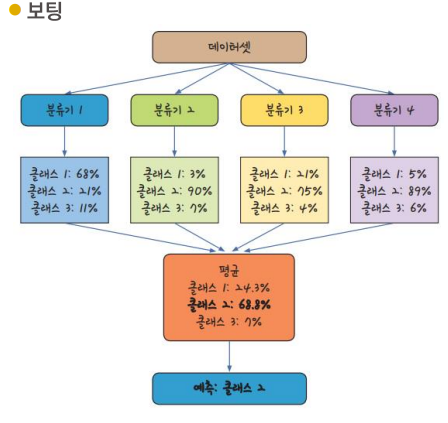

In [64]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [63]:
#에이다 부스트,랜덤포레스트,서포트 벡터머신을 적용해봄

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

In [65]:
classifier = VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)])
classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', SVC(kernel='linear'))])

In [66]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [67]:
#계층별 교차검증 환경설정

skf = StratifiedKFold(n_splits=10,shuffle=True)  #10개로 나눈다.
#shuffle 매개변수를 기본 값 FALSE 대신 TRUE  지정하면 폴드 나누기 전 무작위로 섞임 

#교차 검증을 통해 정확도계산

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

#정확도
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))

#표준편차     
print("Stanard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 75.52 %
Stanard Deviation : 3.30 %


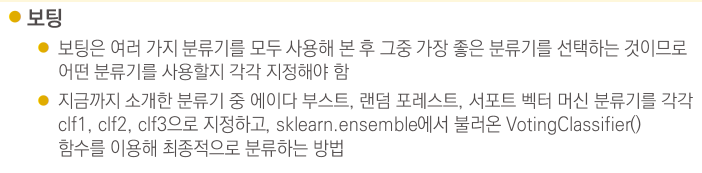

배깅

배깅은  하나의 데이터셋을 '여러개 분리'해 동일한 알고리즘 분류를 실행하는 방법 , 대표적 : 랜덤포레스트,  병렬학습

보팅과 차이점

보팅: '여러가지의 알고리즘'을 '같은 데이터셋'에 적용

Bagging 은 동일한 알고리즘 기반의 여러 Decision Tree 를 사용하지만
Voting 은 다른 알고리즘 기반의 여러 Decision Tree 를 사용합니다.




부스팅 : 순차적 학습.

https://wooono.tistory.com/98


배깅방식은 단일 분류기를 여러번 사용,  과적합방지

분류기를 반복학습하면, 그때마다 학습데이터셋을 다시만듬

부트스트랩 기법사용

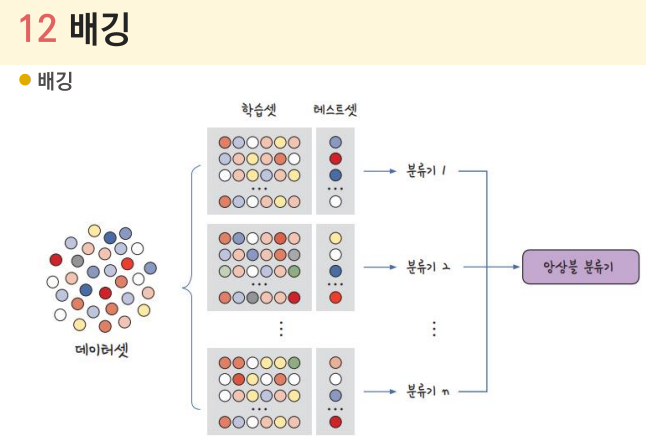

In [68]:
#분류기로 서포트 벡터머신을 이용한 배깅알고리즘..
#배깅 분류기를 불러옴
from sklearn.ensemble import BaggingClassifier

In [70]:
classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'),n_estimators=10)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC())

In [73]:
y_pred = classifier.predict(X_test)
y_pred
#계층별 교차검증 환경설정

skf = StratifiedKFold(n_splits=10,shuffle=True)  #10개로 나눈다.
#shuffle 매개변수를 기본 값 FALSE 대신 TRUE  지정하면 폴드 나누기 전 무작위로 섞임 

#교차 검증을 통해 정확도계산

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [74]:
#정확도
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))

#표준편차     
print("Stanard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 73.78 %
Stanard Deviation : 4.41 %


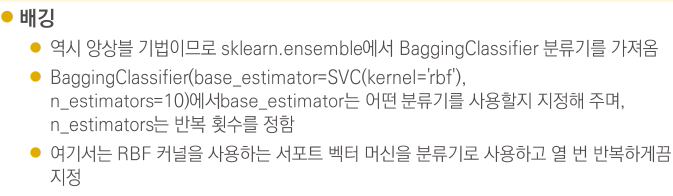

여러가지 알고리즘 성능비교



In [75]:
#분류기지정
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                            ('2',RandomForestClassifier()),
                                            ('3',SVC(kernel='linear'))]),
               BaggingClassifier(base_estimator=clf3,n_estimators=10,random_state=0)]

In [76]:
#분류기 이름지정
classifier_names=['D_tree',
                  'RF',
                  'GNB',
                  'KNN',
                  'Ada',
                  'QDA',
                  'Voting',
                  'Bagging']

In [82]:
#결과 저장 리스트
modelaccuracies=[]
modelmeans=[]
modelnames=[]


In [84]:
#각 분류기 실행해 결과저장
classifier_data = zip(classifier_names,classifiers)

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
for classifier_name,classifier in classifier_data:
  #계층별 교차검증환경
  skf = StratifiedKFold(n_splits=10,shuffle=True)  #10개로 나눈다.
#shuffle 매개변수를 기본 값 FALSE 대신 TRUE  지정하면 폴드 나누기 전 무작위로 섞임 

#교차 검증을 통해 정확도계산

  accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

#정확도
  print(classifier_name,"Accuracy : {:.2f} %".format(accuracies.mean()*100))
  #결과저장
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

D_tree Accuracy : 65.08 %
RF Accuracy : 74.82 %
GNB Accuracy : 75.37 %
KNN Accuracy : 69.82 %
Ada Accuracy : 73.12 %
QDA Accuracy : 72.75 %
Voting Accuracy : 74.49 %
Bagging Accuracy : 75.34 %


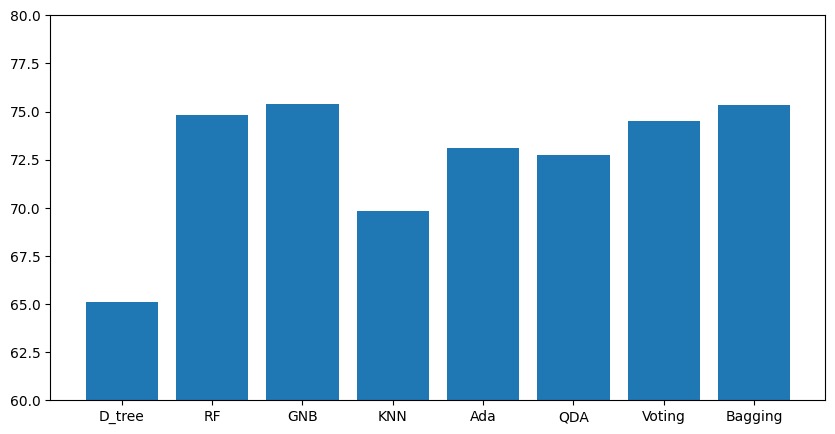

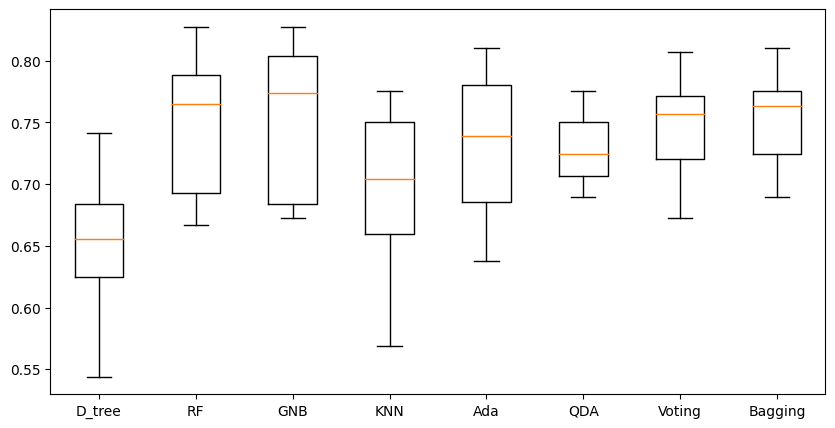

In [88]:
#분류기별 정확도의 평균값을 막대 그래프를 출력합니다.
plt.figure(figsize=(10,5))
plt.ylim([60,80])
plt.bar(modelnames,modelmeans);

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

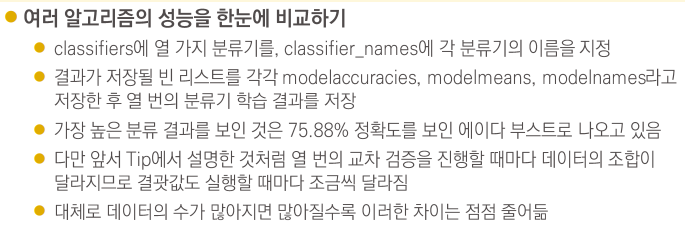